<a href="https://colab.research.google.com/github/Mirucla/Applied-Data-Management/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np


In [36]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [37]:
df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

In [38]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# Checking whether the data is imbalanced or not

In [39]:
df1=df[['amt','gender','city_pop', 'is_fraud']]

In [40]:
df1.head()

,amt,gender,city_pop,is_fraud
0,2.86,M,333497,0
1,29.84,F,302,0
2,41.28,F,34496,0
3,60.05,M,54767,0
4,3.19,M,1126,0


In [41]:
df1['gender'] = pd.factorize(df1['gender'])[0]

<ipython-input-41-0d8a9ee7aad2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'] = pd.factorize(df1['gender'])[0]


In [42]:
df1.head()

,amt,gender,city_pop,is_fraud
0,2.86,0,333497,0
1,29.84,1,302,0
2,41.28,1,34496,0
3,60.05,0,54767,0
4,3.19,0,1126,0


In [43]:
df1['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

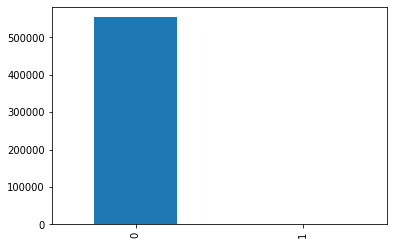

In [44]:
pd.value_counts(df1['is_fraud']).plot.bar()

# Therefor, "Is_fraud" data is imbalanced.  

# 1) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [45]:
columns=df1.columns.tolist()

In [46]:
columns= [i for i in columns if i not in ['is_fraud']]

In [47]:
target='is_fraud'

In [48]:
state=np.random.RandomState(42)

In [49]:
x=df1[columns]
y=df1[target]

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.30, random_state=10)

# 2) Make three sets of training data (Oversample, Undersample and SMOTE)

In [52]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from imblearn import under_sampling, over_sampling

In [54]:
from imblearn.over_sampling import RandomOverSampler

In [55]:
from imblearn.under_sampling import RandomUnderSampler

In [56]:
ros=RandomOverSampler(random_state=0)
x_oresampled, y_oresampled=ros.fit_resample(x_train,y_train)

In [57]:
rus=RandomUnderSampler(random_state=0)
x_uresampled, y_uresampled=rus.fit_resample(x_train,y_train)

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
oversample= SMOTE()
X_s,Y_s=oversample.fit_resample(x_train,y_train)

# 3) Train three logistic regression models

#model 1 (Oversample)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
mod1=LogisticRegression()
mod1.fit(x_oresampled, y_oresampled)

LogisticRegression()

# Model 2 (Undersample) 

In [62]:
mod2=LogisticRegression()
mod2.fit(x_uresampled, y_uresampled)

LogisticRegression()

#Model 3 (SMOTE)

In [63]:
mod3=LogisticRegression()
mod3.fit(X_s, Y_s)

LogisticRegression()

# 4) Test the three models

In [64]:
mod1.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
mod2.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
mod3.predict(x_test)

array([1, 1, 1, ..., 1, 0, 0])

# 5) Which performed best in Out of Sample metrics? 

In [67]:
mod1.score(x_test, y_test)

0.9509705127282324

In [68]:
mod2.score(x_test, y_test)

0.9509705127282324

In [69]:
mod3.score(x_test, y_test)

0.16516711053528155

In [70]:
# Out of the three models, both model 1 and model 2 did the same. 

# 6) Pick two features and plot the two classes before and after SMOTE

In [75]:
import matplotlib.pyplot as plt 
import seaborn as sns 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


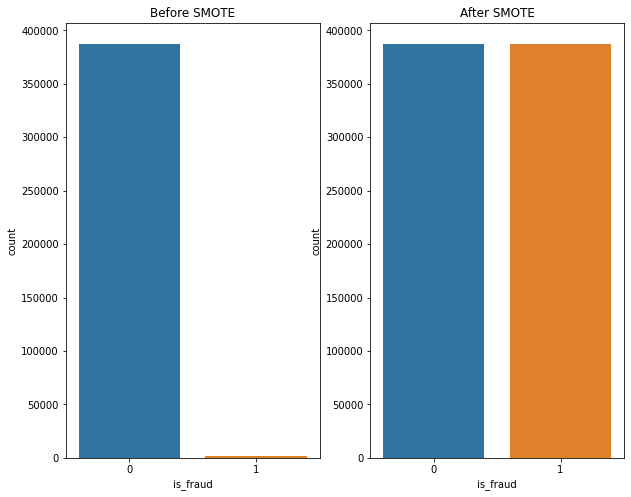

In [78]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title('Before SMOTE')
plt.subplot(1,2,2)
sns.countplot(Y_s)
plt.title('After SMOTE')
plt.show()
